<h1 style="color:#ffc0cb;font-size:70px;font-family:Georgia;text-align:center;"><strong>Movie Recommender System</strong></h1>

### <b>Author: Nguyen Dang Huynh Chau</b>

From Netflix to Disney+, the need to build robust movie recommendation systems is extremely important given the huge demand for personalized content of modern consumers.

An example of recommendation system is such as this:
* User A watches **Game of Thrones** and **Breaking Bad**.
* User B does search on **Game of Thrones**, then the system suggests **Breaking Bad** from data collected about user A.

Recommendation systems are used not only for movies, but on multiple other products and services like Amazon (Books, Items), Pandora/Spotify (Music), Google (News, Search), YouTube (Videos) etc.

Two most ubiquitous types of personalized recommendation systems are **Content-Based** and **Collaborative Filtering**. Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the “wisdom of the crowd” to recommend items. In contrast, content-based recommendation systems focus on the attributes of the items and give you recommendations based on the similarity between them.

In this notebook, we will attempt at implementing these two systems to recommend movies and evaluate them to see which one performs better.

After reading this notebook you will know:

* About the MovieLens dataset problem for recommender system.
* How to load and process the data.
* How to do exploratory data analysis.
* The 2 different types of recommendation engines.
* How to develop a content-based recommendation model based on movie genres.
* How to develop a collaborative filtering model based on user ratings.
* Alternative approach to improve existing models.

Let’s get started.
*****
## The MovieLens Dataset
One of the most common datasets that is available on the internet for building a Recommender System is the [MovieLens DataSet](https://grouplens.org/datasets/movielens/). This version of the dataset that I'm working with ([1M](https://grouplens.org/datasets/movielens/1m/)) contains 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

The data was collected by GroupLens researchers over various periods of time, depending on the size of the set. This 1M version was released on February 2003. Users were selected at random for inclusion. All users selected had rated at least 20 movies.

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📜 Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Data information](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Drop column](#2.2)

2.3 [Typo check](#2.3)

2.4 [Missing Values](#2.4)

> 2.4.1 [Check missing values](#2.4.1)

> 2.4.2 [Fill missing values](#2.4.1)  

>> - 2.4.2.a [Filling missing values for Embarked Feature](#2.4.2.a)
>> - 2.4.2.b [Filling missing values for Cabin Feature](#2.4.2.b)
>> - 2.4.2.c [Filling missing values for Fare Feature](#2.4.2.c)

>> 2.4.2.d [Filling missing values for Age Feature](#2.4.2.d)

2.5 [Data type](#2.5)

2.6 [Upper Case the content](#2.6)

2.7 [Extra-whitespaces](#2.7)

2.8 [Descriptive statistics for Central Tendency](#2.8)

2.9 [Detect Outlier](#2.9)

2.10 [Save The Intermediate Data](#2.10)

<br>

### 3. [Data Exploration (EDA)](#3)

3.1 [Overall look on target variable](#3.1)

3.2 [Frequency of each corresponiding Target variable type](#3.2)

3.3 [Statistical Overview](#3.3)

3.4 [Correlation Matrix and Heatmap](#3.4)

<br>

### 4. [Feature Engineering](#4)

4.1 [Separating dependent and independent variables](#4.1)

4.2 [Encoding](#4.2)

> 4.2.1 [Binary Encoding for Name and Ticket Feature:](#4.2.1)

> 4.2.2 [Binary Encoding for Embarked Feature:](#4.2.2)

4.3 [Separating dependent and independent variables](#4.3)

4.4 [Splitting the training data](#4.4)

4.5 [Feature Scaling](#4.5)

<br>

### 5. [Model Building](#5) 

5.1 [Logistic Regression](#5.1)

5.1 [Feature Scaling](#5.2)

5.1 [Feature Scaling](#5.3)

5.1 [Feature Scaling](#5.4)


<br>

### 6. [Conculsions](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> ✍️ 1. Data Preparation</strong></h1>

<a id="1.1"></a>
# ✴️ 1.1 Importing Necessary Libraries and datasets

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os


# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

# import LogisticRegression model in python. 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.20.3
Pandas version:  1.3.4
Python 3.9.7


<a id="1.2"></a>
# 📲 1.2 Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [3]:
## Importing the datasets
rating = pd.read_csv("Data/ratings.csv", delimiter='\t', skipinitialspace = True, usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

rating.columns = rating.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(rating.shape))

# drop Unnamed, it is just a number given to identify each house
rating.head(3)

The shape of the ORGINAL data is (row, column): (1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [4]:
## Importing the datasets
user = pd.read_csv("Data/users.csv", delimiter='\t', skipinitialspace = True, usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc', 'occupation'])

user.columns = user.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(user.shape))

# drop Unnamed, it is just a number given to identify each house
user.head(3)

The shape of the ORGINAL data is (row, column): (6040, 6)


,user_id,gender,occupation,zipcode,age_desc,occ_desc
0,1,F,10,48067,Under 18,K-12 student
1,2,M,16,70072,56+,self-employed
2,3,M,15,55117,25-34,scientist


In [5]:
## Importing the datasets
movies = pd.read_csv("Data/movies.csv", sep='\t', encoding='latin-1', skipinitialspace = True, usecols=['movie_id', 'title', 'genres'])

movies.columns = movies.columns.str.replace(' ', '') #strip the extra-whitespaces out

print("The shape of the ORGINAL data is (row, column):", str(movies.shape))

# drop Unnamed, it is just a number given to identify each house
movies.head(3)

The shape of the ORGINAL data is (row, column): (3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


<a id="1.3"></a>
# 🔈 1.3 Data Information

In [6]:
print ("The shape of the train data is (row, column):"+ str(rating.shape))
print (rating.info())

The shape of the train data is (row, column):(1000209, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None


In [7]:
print ("The shape of the train data is (row, column):"+ str(user.shape))
print (user.info())

The shape of the train data is (row, column):(6040, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   occupation  6040 non-null   int64 
 3   zipcode     6040 non-null   object
 4   age_desc    6040 non-null   object
 5   occ_desc    6040 non-null   object
dtypes: int64(2), object(4)
memory usage: 283.2+ KB
None


In [8]:
print ("The shape of the train data is (row, column):"+ str(movies.shape))
print (movies.info())

The shape of the train data is (row, column):(3883, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 🧹 2. Data Cleaning</strong></h1>

<a id="2.1"></a>
# 📝 2.1 Typo check:
***
In order to check the typo, all the categories in all the columns with value_count() functions, by counting the typo mistake can appear. For those cloumns has a long values count list, they will be shown by using a for loop in order to check carefully. Each question for each columns all are listed below for catching up with those values in or to decide if the answer is valid or not.

## Users dataset

In [9]:
user['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

### ------> OBSERVATION
*****
I want to replace `M` with `Male` and `F` with `Female`

In [10]:
#Train dataset
user.loc[user['gender'].isin(['F']), 'gender'] = 'Female'
user.loc[user['gender'].isin(['M']), 'gender'] = 'Male'

In [11]:
user['age_desc'].value_counts()

25-34       2096
35-44       1193
18-24       1103
45-49        550
50-55        496
56+          380
Under 18     222
Name: age_desc, dtype: int64

In [12]:
user['occ_desc'].value_counts()

college/grad student      759
other or not specified    711
executive/managerial      679
academic/educator         528
technician/engineer       502
programmer                388
sales/marketing           302
writer                    281
artist                    267
self-employed             241
doctor/health care        236
K-12 student              195
clerical/admin            173
scientist                 144
retired                   142
lawyer                    129
customer service          112
homemaker                  92
unemployed                 72
tradesman/craftsman        70
farmer                     17
Name: occ_desc, dtype: int64

## Movies dataset

In [13]:
movies['title'].value_counts()

Toy Story (1995)                           1
Buena Vista Social Club (1999)             1
Son of Frankenstein (1939)                 1
Ghost of Frankenstein, The (1942)          1
Frankenstein Meets the Wolf Man (1943)     1
                                          ..
Kids of Survival (1993)                    1
Alien³ (1992)                              1
American Werewolf in London, An (1981)     1
Amityville 1992: It's About Time (1992)    1
Contender, The (2000)                      1
Name: title, Length: 3883, dtype: int64

In [14]:
movies['genres'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genres, Length: 301, dtype: int64

In [15]:
movies = movies.assign(genres=movies.genres.str.split("|")).explode('genres')

<a id="2.2"></a>
# 📚 2.2 Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


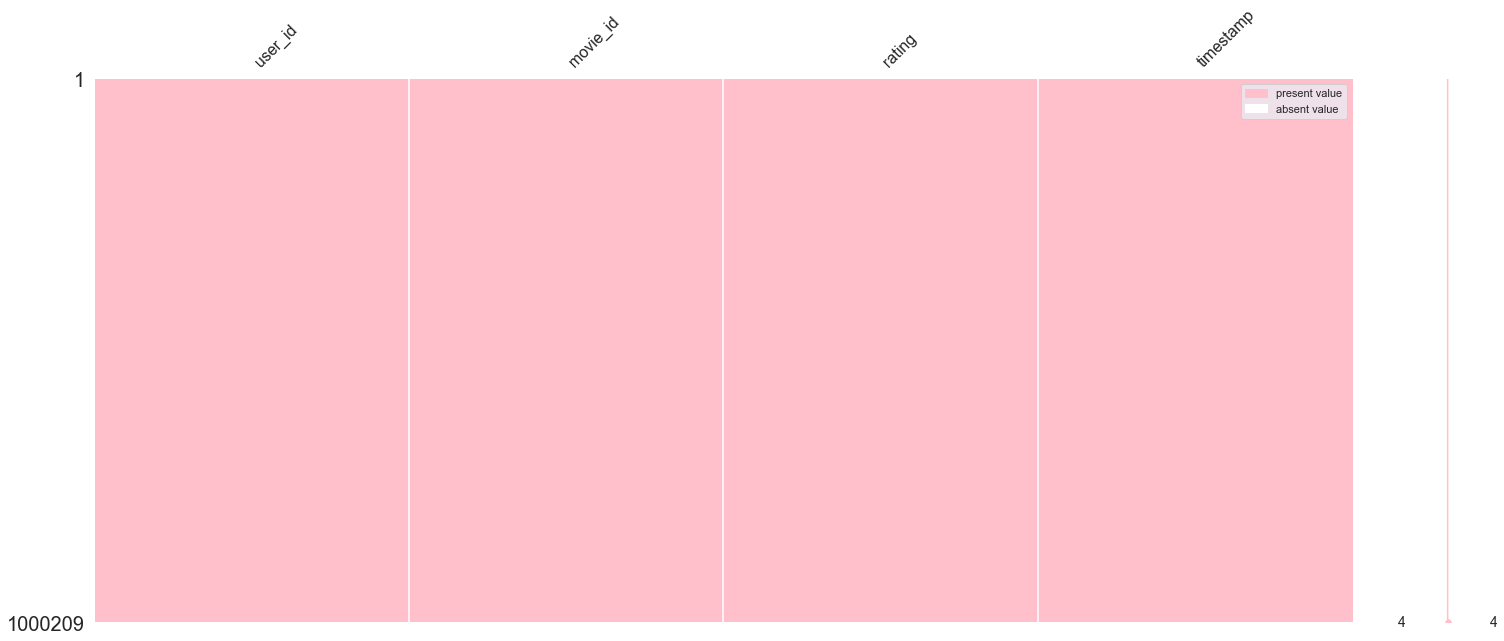

In [16]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(rating).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(rating, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


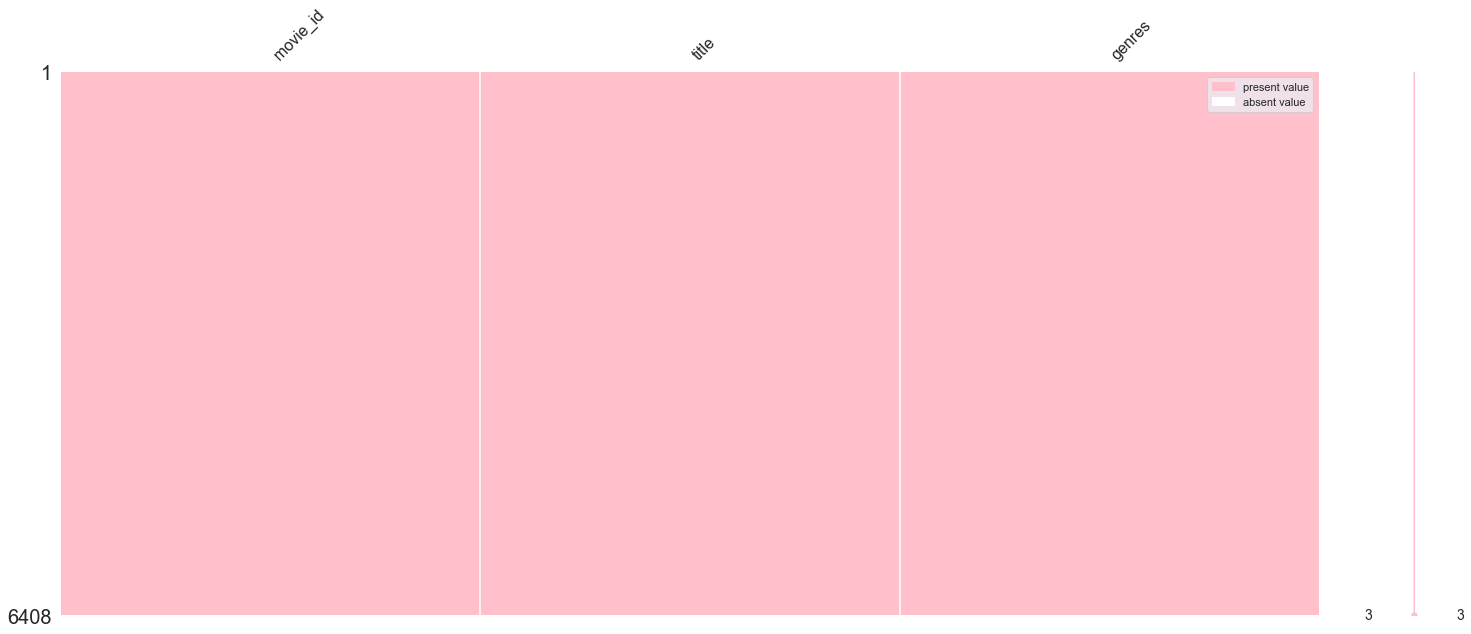

In [17]:
# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(movies).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(movies, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in the dataframe in descending: 
 Empty DataFrame
Columns: [Total, Percent]
Index: []


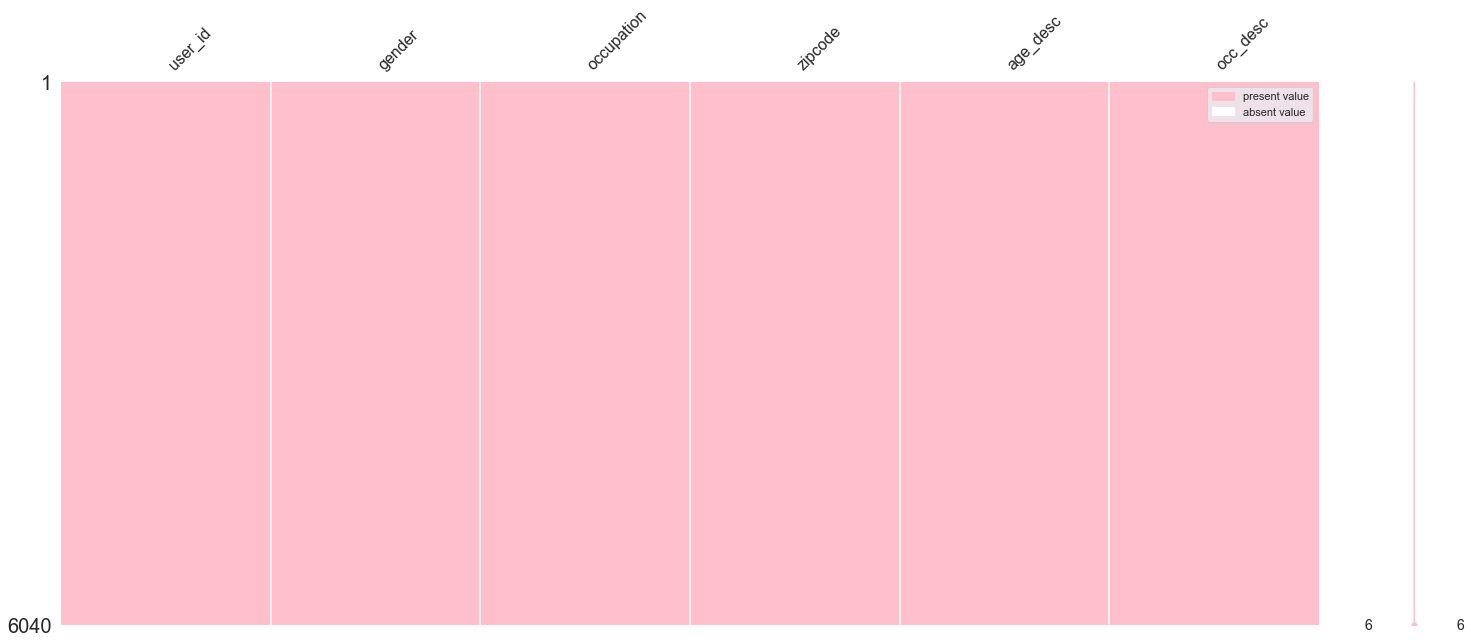

In [18]:
# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(user).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(user, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION
*****
There is no missing value.

<a id="2.3"></a>
# 🦄 2.3 Data type
***

## user dataset

In [19]:
user['gender'] = user['gender'].astype('string')
user['zipcode'] = user['zipcode'].astype('string')
user['age_desc'] = user['age_desc'].astype('string')
user['occ_desc'] = user['occ_desc'].astype('string')


## movies dataset

In [20]:
movies['title'] = movies['title'].astype('string')
movies['genres'] = movies['genres'].astype('string')

<a id="2.4"></a>
# 💭 2.4 Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 
****
## rating dataset

In [21]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
rating = rating.applymap(lambda s: s.upper() if type(s) == str else s)
rating.head(3)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


## user dataset

In [22]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
user = user.applymap(lambda s: s.upper() if type(s) == str else s)
user.head(3)

,user_id,gender,occupation,zipcode,age_desc,occ_desc
0,1,FEMALE,10,48067,UNDER 18,K-12 STUDENT
1,2,MALE,16,70072,56+,SELF-EMPLOYED
2,3,MALE,15,55117,25-34,SCIENTIST


## movies dataset

In [23]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
movies = movies.applymap(lambda s: s.upper() if type(s) == str else s)
movies.head(3)

,movie_id,title,genres
0,1,TOY STORY (1995),ANIMATION
0,1,TOY STORY (1995),CHILDREN'S
0,1,TOY STORY (1995),COMEDY


<a id="2.5"></a>
# 📚 2.5 Extra-whitespaces:
***
There are some time maybe an extra-whitespaces in the database, which results in comparison failures, NaN Value, and greater size. First of all, extra-whitespaces cause string with and without it to not be the same. For instance, "ABC" != " ABC", these two strings are not equal, and that mistake cannot be noticed straightforwardly since the difference is inconsiderable. Nevertheless, the computer cannot understand that mistake. Secondly, the extra-whitespaces can be record as NaN values in pandas, which results in unexpected result. Last but not least, the whitespaces can increase the size of the database so that they can overflow the limited size. So that data should be checked with extra-whitespaces carefully.

In [24]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(rating)
whitespace_remover(user)
whitespace_remover(movies)

<a id="2.6"></a>
# 📊 2.6 Descriptive statistics for Central Tendency

## rating dataset

In [25]:
# see the static of all numerical column
rating.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1000209.0,3.024512e+03,1.728413e+03,1.0,1506.0,3070.0,4476.0,6.040000e+03
movie_id,1000209.0,1.865540e+03,1.096041e+03,1.0,1030.0,1835.0,2770.0,3.952000e+03
rating,1000209.0,3.581564e+00,1.117102e+00,1.0,3.0,4.0,4.0,5.000000e+00
timestamp,1000209.0,9.722437e+08,1.215256e+07,956703932.0,965302637.0,973018006.0,975220939.0,1.046455e+09


## movies dataset

In [26]:
# see the static of all numerical column
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movie_id,6408.0,1949.873283,1136.449312,1.0,977.75,1962.5,2911.25,3952.0


## user dataset

In [27]:
# see the static of all numerical column
user.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,6040.0,3020.500000,1743.742145,1.0,1510.75,3020.5,4530.25,6040.0
occupation,6040.0,8.146854,6.329511,0.0,3.00,7.0,14.00,20.0


<a id="2.7"></a>
# 📂 2.7 Save the Intermediate data
***
After the cleaning step, all data is saved to a csv file for visualisation step later in dash.

In [28]:
rating.to_csv("Data/rating_cleaned.csv", encoding='utf-8')
user.to_csv("Data/user_cleaned.csv", encoding='utf-8')
movies.to_csv("Data/movies_cleaned.csv", encoding='utf-8')


<a id="3"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong> 📊 3. Data exploration (EDA)</strong></h1>


<a id="3.1"></a>
# 3.1 Overall look on target variable
****

<a id="3.1.1"></a>
## 3.1.1 Rating
***

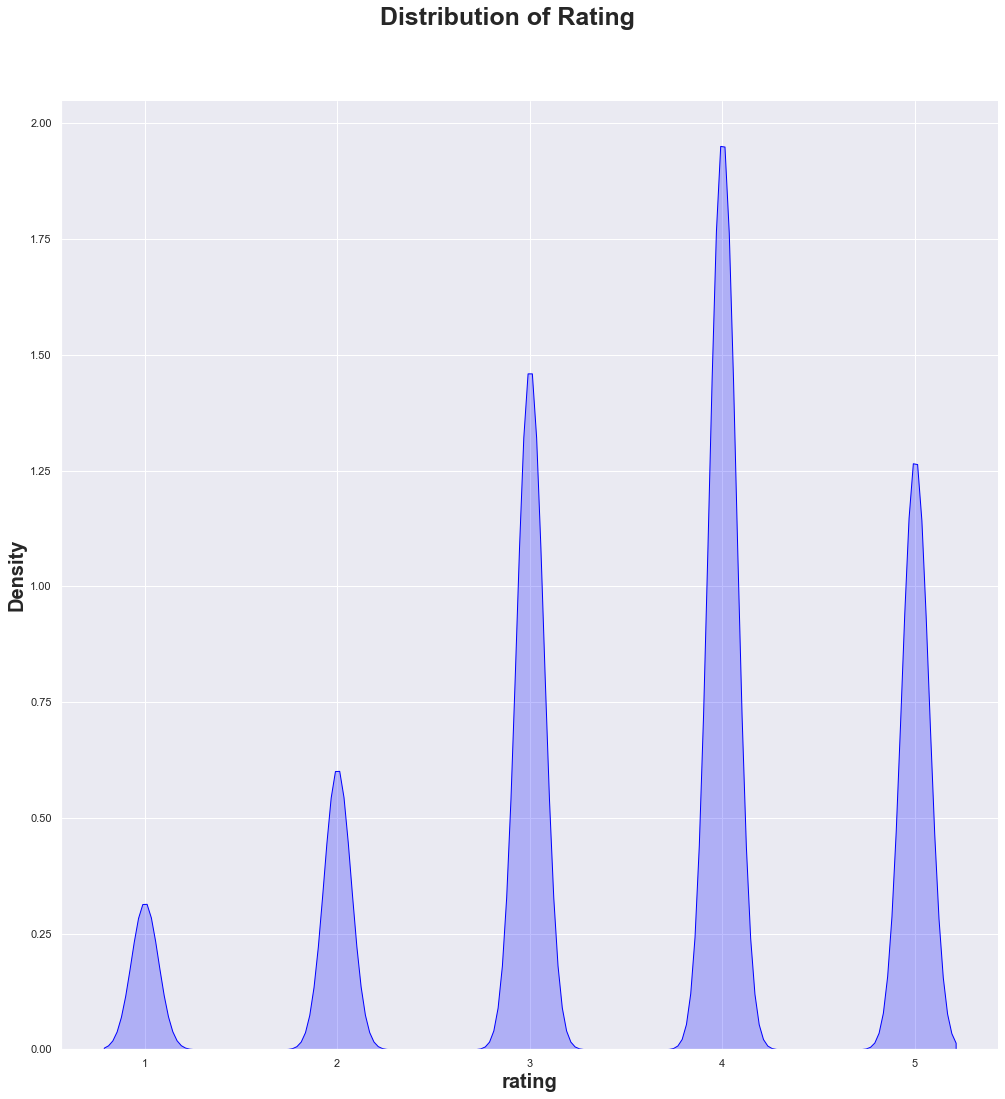

In [29]:
# sns.displot(train, x="Survived", hue="Pclass", kind="kde", fill=True)
plot = sns.displot(rating, x="rating", kind="kde", fill=True, color='blue', height= 14)


plot.fig.suptitle("Distribution of Rating", fontsize=25, y=1.08, fontweight = 'bold')
plot.set_xlabels("rating", fontsize = 20, fontweight = 'bold' )
plot.set_ylabels("Density", fontsize = 20, fontweight = 'bold')

### ------> OBSERVATION
*****
It appears that users are quite generous in their ratings. The mean rating is 3.58 on a scale of 5. Half the movies have a rating of 4 and 5. I personally think that a 5-level rating skill wasn’t a good indicator as people could have different rating styles (i.e. person A could always use 4 for an average movie, whereas person B only gives 4 out for their favorites). Each user rated at least 20 movies, so I doubt the distribution could be caused just by chance variance in the quality of movies.

Let's also take a look at a subset of 20 movies with the highest rating.

In [30]:
# Join all 3 files into one dataframe
df = pd.merge(pd.merge(movies, rating),user)
# Display 20 movies with highest ratings
df[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,TOY STORY (1995),ANIMATION,5
1026437,ROCKY (1976),DRAMA,5
1026480,SAVING PRIVATE RYAN (1998),WAR,5
1026481,"HONEY, I SHRUNK THE KIDS (1989)",ADVENTURE,5
1026482,"HONEY, I SHRUNK THE KIDS (1989)",CHILDREN'S,5
1026483,"HONEY, I SHRUNK THE KIDS (1989)",COMEDY,5
1026484,"HONEY, I SHRUNK THE KIDS (1989)",FANTASY,5
1026485,"HONEY, I SHRUNK THE KIDS (1989)",SCI-FI,5
1026490,BLUE VELVET (1986),DRAMA,5
1026491,BLUE VELVET (1986),MYSTERY,5


<a id="3.1.2"></a>
## 3.1.2 Genres
***

Text(0, 0.5, 'Number of films')

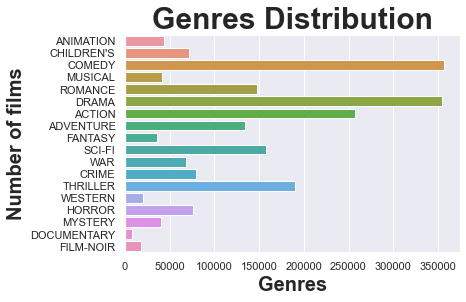

In [31]:
ax = sns.countplot(y="genres", data=df)
sns.set(style="darkgrid")

ax.set_title("Genres Distribution", fontsize = 30, fontweight = 'bold' )
ax.set_xlabel("Genres", fontsize = 20, fontweight = 'bold' )
ax.set_ylabel("Number of films", fontsize = 20, fontweight = 'bold' )

### ------> OBSERVATION
*****
There are 5 types of genres which are drama, comedy, action, thriller and romance are popular choice, while the fantasy, western, and film-noir seem to be less interesting for the audiences

<a id="3.1.3"></a>
## 3.1.3 Years of the movies
***

Text(0.5, 0, 'Years')

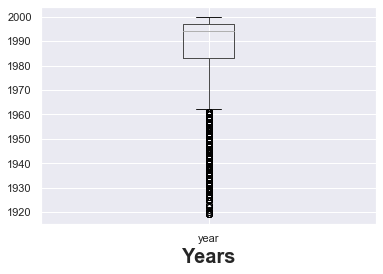

In [32]:
movies['year'] = movies['title'].str[-5:-1].astype(int)
ax = movies.boxplot(column= "year")

ax.set_xlabel("Years", fontsize = 20, fontweight = 'bold' )

### ------> OBSERVATION
*****
There are 5 types of genres which are drama, comedy, action, thriller and romance are popular choice, while the fantasy, western, and film-noir seem to be less interesting for the audiences

Text(0, 0.5, 'Number of films')

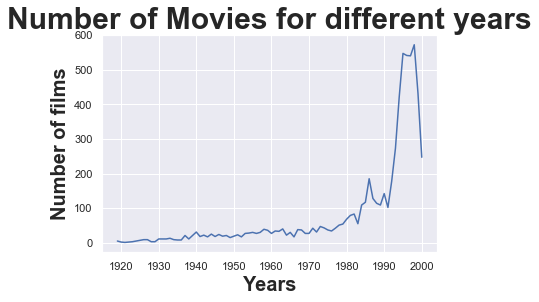

In [33]:
ax = movies.groupby('year').count()['movie_id'].plot()

ax.set_title("Number of Movies for different years", fontsize = 30, fontweight = 'bold' )
ax.set_xlabel("Years", fontsize = 20, fontweight = 'bold' )
ax.set_ylabel("Number of films", fontsize = 20, fontweight = 'bold' )

### ------> OBSERVATION
*****
There are 5 types of genres which are drama, comedy, action, thriller and romance are popular choice, while the fantasy, western, and film-noir seem to be less interesting for the audiences